In [1]:
!pip install opendatasets -q


In [2]:
# import necessary libraries
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
{"username":"sadaruwanrathnayaka","key":"bc8087ff459e2fce0606da6e0f32ce70"}
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sadaruwanrathnayaka
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:00<00:00, 1.32GB/s]

In [4]:
BATCH_SIZE=32
IMAGE_SIZE=(128,128)

In [5]:
test_data_dir="/content/cats-and-dogs-for-classification/cats_dogs/test"
train_data_dir="/content/cats-and-dogs-for-classification/cats_dogs/train"

In [6]:
train_data=tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                    batch_size=BATCH_SIZE,
                                                    image_size=IMAGE_SIZE,
                                                       subset="training",
                                                       validation_split=0.1,
                                                       seed=42)

validation_data=tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                      batch_size=BATCH_SIZE,
                                                      image_size=IMAGE_SIZE,
                                                      subset="validation",
                                                      validation_split=0.1,
                                                      seed=42)

test_data=tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                batch_size=BATCH_SIZE,
                                                image_size=IMAGE_SIZE)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [8]:
class_names = train_data.class_names
print(class_names)

['cats', 'dogs']


In [9]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


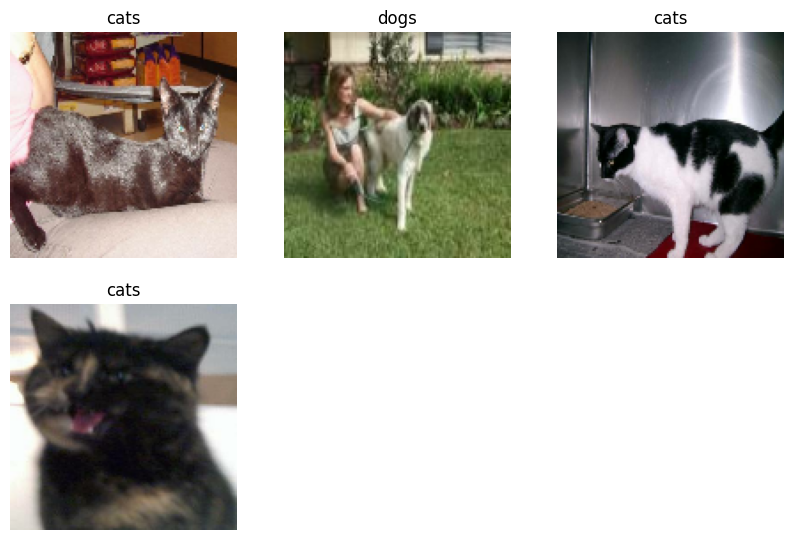

In [10]:
# see the images
plt.figure(figsize=(10,10))
for image, label in train_data.take(1):
  for i in range(4):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [11]:
#view first betch

for image,label in train_data.take(1):
  for i in range(1):
    print(image)




tf.Tensor(
[[[[101.00769   104.00769   109.00769  ]
   [111.074585  112.71521   114.30505  ]
   [117.635284  115.31354   112.59396  ]
   ...
   [129.86246   132.91324   136.22964  ]
   [126.8725    133.10297   135.69281  ]
   [128.9002    138.99207   139.94614  ]]

  [[ 85.20029    88.20029    93.20029  ]
   [ 99.3725     99.79227   101.78906  ]
   [114.00287   112.997925  110.048706 ]
   ...
   [116.720825  120.720825  123.720825 ]
   [119.9389    126.16937   128.75922  ]
   [138.79547   147.0824    148.93893  ]]

  [[ 92.54297    94.90234    99.58203  ]
   [ 91.57605    91.986206   93.986206 ]
   [105.38388   104.38388   101.75107  ]
   ...
   [120.73743   125.52237   128.52237  ]
   [130.21445   135.21445   138.21445  ]
   [127.32648   134.36554   136.68585  ]]

  ...

  [[118.07504   122.07504   125.07504  ]
   [121.617584  125.617584  128.61758  ]
   [130.54602   134.54602   137.54602  ]
   ...
   [ 81.51825    87.02301    96.76108  ]
   [ 45.951294   50.819916   54.147003 ]
   [ 

In [12]:
#Feature Scalling

train_data=train_data.map(lambda x,y:(x/255,y))
validation_data=validation_data.map(lambda x,y:(x/255,y))
test_data=test_data.map(lambda x,y:(x/255,y))

for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.15117954 0.08451287 0.12372855]
   [0.1564951  0.08982843 0.12904412]
   [0.14387254 0.07720588 0.11642157]
   ...
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.15078124 0.08411458 0.12333027]
   [0.1463848  0.07971814 0.11893383]
   [0.13852635 0.07185968 0.11107536]
   ...
   [0.         0.         0.        ]
   [0.         0.00127145 0.        ]
   [0.         0.         0.        ]]

  [[0.15681386 0.09014719 0.12936288]
   [0.15010071 0.08343404 0.12264973]
   [0.1491728  0.08250613 0.12172181]
   ...
   [0.00392157 0.         0.        ]
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.7237403  0.6738876  0.726761  ]
   [0.7528033  0.7035823  0.75956535]
   [0.77319306 0.71951526 0.7698836 ]
   ...
   [0.04705882 0.00392157 0.03529412]
   [0.05098039 0.         0.03529412]
   [0.0395804  0.         0.03137255]]

  [[0.7596398  0.66668636 0.694030

In [13]:
#Transfer Learning
pretrained_model=tf.keras.applications.xception.Xception(include_top=False,
input_shape=(128,128,3),
weights='imagenet',
pooling='max')

for layer in pretrained_model.layers:
  layer.trainable=False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [14]:
#model building
model = tf.keras.Sequential()
model.add(pretrained_model)
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,144,425 (80.66 MB)

 Trainable params: 282,945 (1.08 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [15]:
#compilation

model.compile(optimizer=tf.keras.optimizers.Adam(),
loss=tf.keras.losses.BinaryCrossentropy(),
metrics=['accuracy'])


In [16]:
start_time=time.time()

history=model.fit(train_data,
                  epochs=3,
                  validation_data=validation_data)

end_time=time.time()

Epoch 1/3
225/225 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - accuracy: 0.9076 - loss: 0.2072 - val_accuracy: 0.9613 - val_loss: 0.1041
Epoch 2/3
225/225 ━━━━━━━━━━━━━━━━━━━━ 340s 2s/step - accuracy: 0.9504 - loss: 0.1122 - val_accuracy: 0.9525 - val_loss: 0.1100
Epoch 3/3
225/225 ━━━━━━━━━━━━━━━━━━━━ 329s 1s/step - accuracy: 0.9655 - loss: 0.0929 - val_accuracy: 0.9613 - val_loss: 0.1071


In [17]:
print(f'total time for traning {(end_time-start_time):.3f} seconds')

total time for traning 1006.486 seconds


In [18]:
history.history

{'accuracy': [0.9298611283302307, 0.9498611092567444, 0.9631944298744202],
 'loss': [0.16736914217472076, 0.11592939496040344, 0.09366337954998016],
 'val_accuracy': [0.9612500071525574, 0.9524999856948853, 0.9612500071525574],
 'val_loss': [0.10409441590309143, 0.11003241688013077, 0.10707052052021027]}

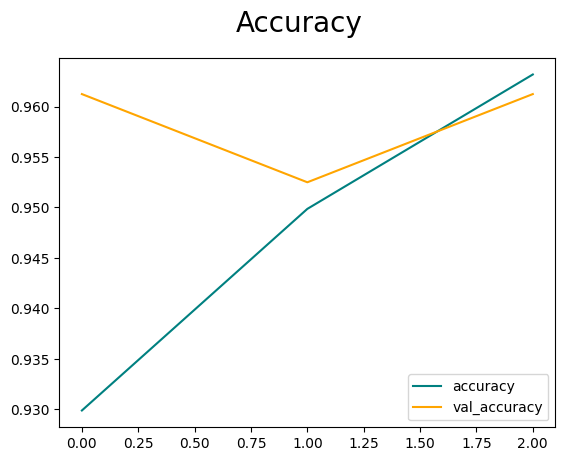

In [19]:
fig=plt.figure()
plt.plot(history.history['accuracy'],color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend( )
plt.show()


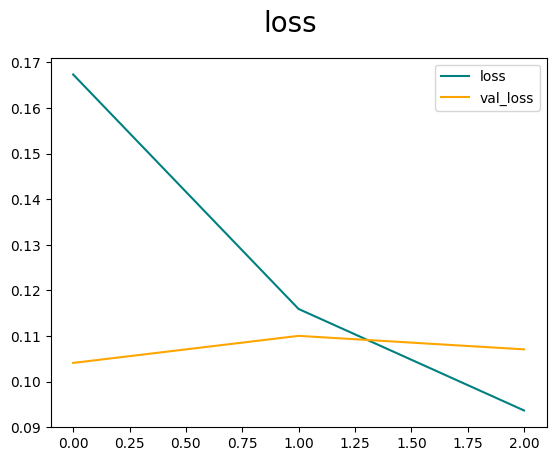

In [20]:
fig=plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
plt.suptitle('loss',fontsize=20)
plt.legend()
plt.show()

In [21]:
#evaluation
precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()
accuracy=tf.keras.metrics.BinaryAccuracy()

In [22]:
for batch in test_data.as_numpy_iterator():
  X,y=batch
  yhat=model.predict(X)
  precision.update_state(y,yhat)
  recall.update_state(y,yhat)
  accuracy.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [23]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9353281855583191>

In [24]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.968999981880188>

In [25]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9509999752044678>

In [26]:
import cv2

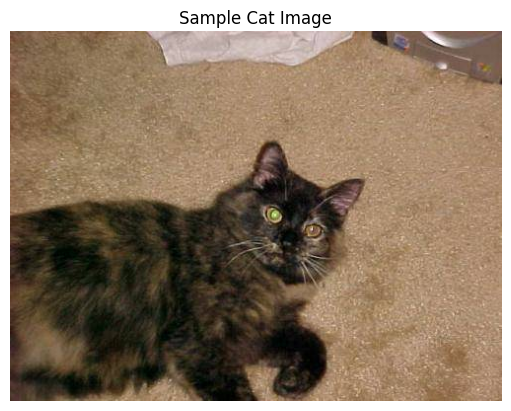

In [27]:
import cv2
import matplotlib.pyplot as plt

image_path = "/content/cats-and-dogs-for-classification/cats_dogs/test/cats/cat.4004.jpg"
image = cv2.imread(image_path)

# OpenCV reads images in BGR format, so convert to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Sample Cat Image")
plt.axis('off')
plt.show()

In [28]:
resized_image = tf.image.resize(image,IMAGE_SIZE)
scaled_image=resized_image/255
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.23249212, 0.31484506, 0.4364137 ],
        [0.2637003 , 0.3499748 , 0.45977873],
        [0.22818083, 0.31841084, 0.42030376],
        ...,
        [0.3299545 , 0.37416077, 0.501789  ],
        [0.33943015, 0.37472427, 0.5055893 ],
        [0.3319853 , 0.33915442, 0.4446385 ]],

       [[0.24667192, 0.32375523, 0.46347842],
        [0.2775335 , 0.35637847, 0.49239257],
        [0.2686329 , 0.35139945, 0.47172725],
        ...,
        [0.36991525, 0.4050715 , 0.51329756],
        [0.31904942, 0.34569445, 0.45498693],
        [0.34427083, 0.37070882, 0.46930543]],

       [[0.21718206, 0.29775473, 0.45211512],
        [0.24595146, 0.33011743, 0.47551095],
        [0.25682133, 0.34309584, 0.48035076],
        ...,
        [0.33779332, 0.36899623, 0.4595316 ],
        [0.34754017, 0.3708299 , 0.4615053 ],
        [0.31969646, 0.3775396 , 0.46804535]],

       ...,

       [[0.188638  , 0.23585875, 0.30519414],
        [0.16

In [29]:
np.expand_dims(scaled_image,0).shape


(1, 128, 128, 3)

In [30]:
y_hat=model.predict(np.expand_dims(scaled_image,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [31]:
y_hat


array([[0.0011921]], dtype=float32)

In [40]:
class_names

['cats', 'dogs']

In [44]:
if y_hat >= 0.5:
  print(class_names[1])
else:
  print(class_names[0])


cats


In [43]:
# save the model
saved_model_path = "/content/saved_model.keras"
model.save(saved_model_path)